In [1]:
from eli5.sklearn import PermutationImportance
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv('kubraHDAII.csv')

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]


In [3]:
X.shape

(1086, 881)

In [4]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1083,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1084,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y

array([5.69897  , 4.8068754, 5.69897  , ..., 4.       , 4.30103  ,
       4.       ])

In [10]:
df.columns


Index(['Unnamed: 0', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3',
       'PubchemFP4', 'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8',
       ...
       'PubchemFP872', 'PubchemFP873', 'PubchemFP874', 'PubchemFP875',
       'PubchemFP876', 'PubchemFP877', 'PubchemFP878', 'PubchemFP879',
       'PubchemFP880', 'pIC50'],
      dtype='object', length=883)

In [65]:
clf = RandomForestRegressor()


In [66]:
sel = SelectFromModel(clf,threshold=0.003).fit(X, y)
feature_idx = sel.get_support()
feature_name = X.columns[feature_idx]


In [67]:
len(feature_name)

51

In [68]:
feature_name

Index(['PubchemFP12', 'PubchemFP16', 'PubchemFP19', 'PubchemFP34',
       'PubchemFP115', 'PubchemFP116', 'PubchemFP143', 'PubchemFP144',
       'PubchemFP180', 'PubchemFP181', 'PubchemFP186', 'PubchemFP215',
       'PubchemFP335', 'PubchemFP338', 'PubchemFP349', 'PubchemFP353',
       'PubchemFP374', 'PubchemFP385', 'PubchemFP388', 'PubchemFP390',
       'PubchemFP391', 'PubchemFP392', 'PubchemFP397', 'PubchemFP404',
       'PubchemFP412', 'PubchemFP489', 'PubchemFP508', 'PubchemFP517',
       'PubchemFP540', 'PubchemFP576', 'PubchemFP577', 'PubchemFP593',
       'PubchemFP611', 'PubchemFP613', 'PubchemFP638', 'PubchemFP645',
       'PubchemFP646', 'PubchemFP656', 'PubchemFP672', 'PubchemFP685',
       'PubchemFP699', 'PubchemFP703', 'PubchemFP712', 'PubchemFP715',
       'PubchemFP716', 'PubchemFP736', 'PubchemFP755', 'PubchemFP791',
       'PubchemFP799', 'PubchemFP818', 'PubchemFP860'],
      dtype='object')

In [69]:
X_columns = df[feature_name] 
X_new = df[feature_name].values

<AxesSubplot:xlabel='Importance', ylabel='Features'>

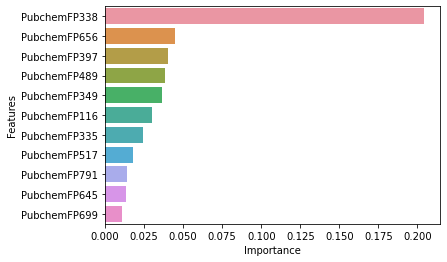

In [70]:
df_selected = pd.DataFrame({'Features': df.columns[:-1],  'Importance': sel.estimator_.feature_importances_})
df_selected_sort = df_selected.sort_values('Importance', ascending=False).head(11)
sns.barplot(data=df_selected_sort, x='Importance', y='Features')

In [33]:
import matplotlib.pyplot as plt

In [34]:
def scoreResults(model, x_train, x_test, y_train, y_test):

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    mse_train = metrics.mean_squared_error(y_train, y_train_predict)
    mse_test = metrics.mean_squared_error(y_test, y_test_predict)

    return [r2_train, r2_test, mse_train, mse_test]

In [71]:
model_rf = RandomForestRegressor()

In [73]:
scores = []

k = 10
iter = 1
cv = KFold(n_splits=k)
for train_index, test_index in cv.split(X_new):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    x_train, x_test, y_train, y_test = X_new[train_index], X_new[test_index], y[train_index], y[test_index]
    model_rf.fit(x_train, y_train)
    
    if iter == 2:
        x_train_sel = x_train
        x_test_sel = x_test
        y_train_sel = y_train
        y_test_sel = y_test
        
    result = scoreResults(model = model_rf
                          ,x_train = x_train
                          ,x_test = x_test
                          ,y_train = y_train
                          ,y_test = y_test)

    print(f"{iter}. veri kesiti")
    print(f"Train R2 Score: {result[0]:.4f} MSE: {result[2]:.4f}")
    print(f"Test R2 Score: {result[1]:9.4f} MSE: {result[3]:.4f}\n")
    iter += 1
    scores.append(model_rf.score(x_test, y_test))

1. veri kesiti
Train R2 Score: 0.8852 MSE: 0.1678
Test R2 Score:   -0.1082 MSE: 0.3927

2. veri kesiti
Train R2 Score: 0.8933 MSE: 0.1623
Test R2 Score:    0.4774 MSE: 0.5695

3. veri kesiti
Train R2 Score: 0.8998 MSE: 0.1525
Test R2 Score:    0.1520 MSE: 1.1115

4. veri kesiti
Train R2 Score: 0.8991 MSE: 0.1527
Test R2 Score:   -0.2729 MSE: 0.8687

5. veri kesiti
Train R2 Score: 0.8823 MSE: 0.1695
Test R2 Score:    0.0947 MSE: 0.7027

6. veri kesiti
Train R2 Score: 0.8978 MSE: 0.1632
Test R2 Score:   -0.5963 MSE: 0.9757

7. veri kesiti
Train R2 Score: 0.8894 MSE: 0.1652
Test R2 Score:   -0.2038 MSE: 1.2078

8. veri kesiti
Train R2 Score: 0.8852 MSE: 0.1614
Test R2 Score:   -0.2032 MSE: 2.1266

9. veri kesiti
Train R2 Score: 0.8914 MSE: 0.1719
Test R2 Score:    0.1058 MSE: 0.5606

10. veri kesiti
Train R2 Score: 0.8807 MSE: 0.1735
Test R2 Score:   -0.9940 MSE: 2.3519



In [74]:
model = RandomForestRegressor()

model.fit(x_train_sel, y_train_sel)


print(r2_score(y_train_sel, model.predict(x_train_sel)))
print(r2_score(y_test_sel, model.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model.predict(x_test_sel)))


0.8925010993832216
0.4606879818654419
0.27476497083583923
0.5757889635421292
0.16354122007463562
0.5876250988214448


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='pIC50'>

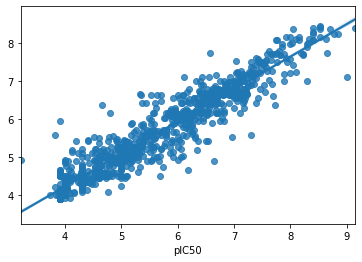

In [76]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns

rf_predict = model.predict(x_train_sel)

sns.regplot(y_train_sel, rf_predict)



Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='pIC50'>

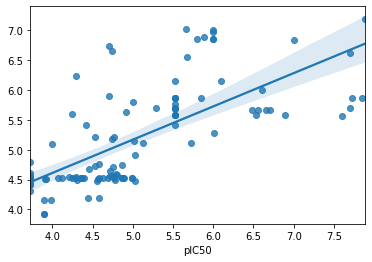

In [77]:
rf_predict = model.predict(x_test_sel)

sns.regplot(y_test_sel, rf_predict)

In [78]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor()

model_xgb.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_xgb.predict(x_train_sel)))
print(r2_score(y_test_sel, model_xgb.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_xgb.predict(x_train_sel)))
print(mean_squared_error(y_train_sel, model_xgb.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_xgb.predict(x_test_sel)))
print(mean_squared_error(y_test_sel, model_xgb.predict(x_test_sel)))



0.9125829354417576
0.3860214289618539
0.21998073280351882
0.13299013581694993
0.5885799429403468
0.6689804906044637


In [79]:
from sklearn.tree import DecisionTreeRegressor

model_dcs = DecisionTreeRegressor()

model_dcs.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_dcs.predict(x_train_sel)))
print(r2_score(y_test_sel, model_dcs.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_dcs.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_dcs.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_dcs.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_dcs.predict(x_test_sel)))


0.9152649378291265
-0.05474810163309174
0.19781223448612065
0.8546535583787477
0.1289099271807982
1.1492353899282806


In [80]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor()

model_mlp.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_mlp.predict(x_train_sel)))
print(r2_score(y_test_sel, model_mlp.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_mlp.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_mlp.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_mlp.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_mlp.predict(x_test_sel)))

0.7583115795545277
-0.06319567147270244
0.4420447503688057
0.9060821087477043
0.367687659415885
1.1584397167277694


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [82]:
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor()

model_bag.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_bag.predict(x_train_sel)))
print(r2_score(y_test_sel, model_bag.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_bag.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_bag.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_bag.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_bag.predict(x_test_sel)))

0.8836926372383024
0.4290764927025712
0.27914521105114354
0.5982382164136688
0.17694179103765165
0.6220684336973797


In [61]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()

model_lin.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_lin.predict(x_train_sel)))
print(r2_score(y_test_sel, model_lin.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_lin.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_lin.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_lin.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_lin.predict(x_test_sel)))


0.5232362997060034
0.2413117634838946
0.6381461439479672
0.6706718765500367
0.7253145547165583
0.8266536531107139


In [83]:
from sklearn.svm import SVR

model_svm = SVR()

model_svm.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_svm.predict(x_train_sel)))
print(r2_score(y_test_sel, model_svm.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_svm.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_svm.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_svm.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_svm.predict(x_test_sel)))

0.7418266196173958
0.2526111941889936
0.3987198723717529
0.7164465868536386
0.3927667108808936
0.8143419877640441


In [84]:
from sklearn.linear_model import Ridge
model_rid = Ridge()

model_rid.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_rid.predict(x_train_sel)))
print(r2_score(y_test_sel, model_rid.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_rid.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_rid.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_rid.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_rid.predict(x_test_sel)))


0.5774921296099855
0.20742882543334829
0.6087820753295782
0.7066117902383122
0.6427735745972301
0.8635719196258607


In [85]:
import random
random.seed(0)

100%|===================| 976/977 [00:20<00:00]        

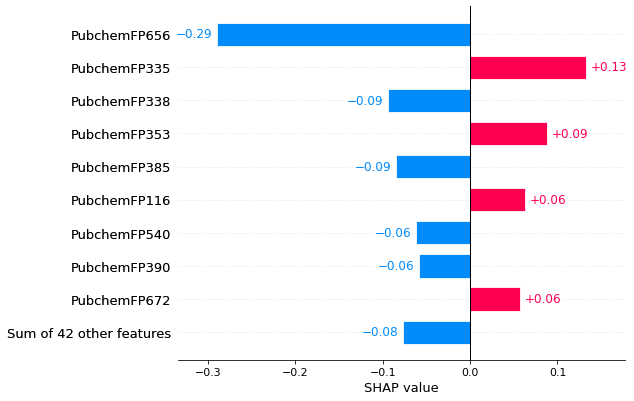

In [96]:
import shap
explainer = shap.TreeExplainer(model, x_train_sel,feature_names=list(feature_name))
shap_values = explainer(x_train_sel)

shap.plots.bar(shap_values[0])

In [ ]:
import shap
explainer = shap.TreeExplainer(model, x_train_sel,feature_names=list(feature_name))
shap_values = explainer(x_train_sel)

shap.plots.bar(shap_values[1])

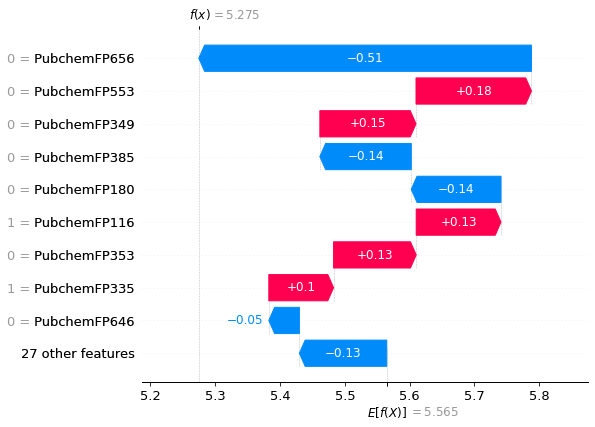

In [49]:

shap.plots.waterfall(shap_values[0])
max_display=31

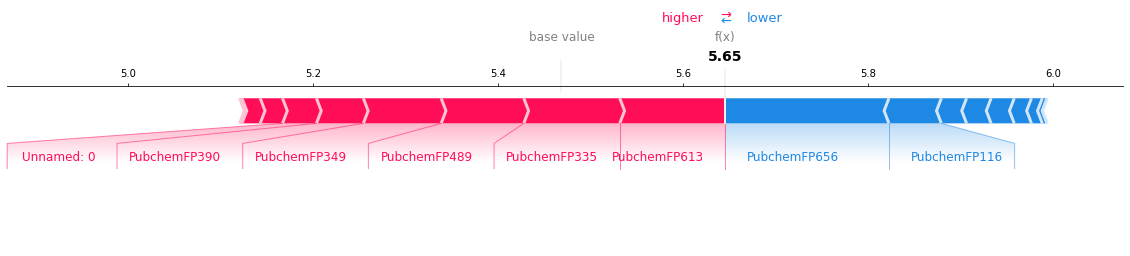

In [35]:
random.seed(0)
shap.plots.force(explainer.expected_value, shap_values[0].values, feature_names=list(feature_name), matplotlib=True)

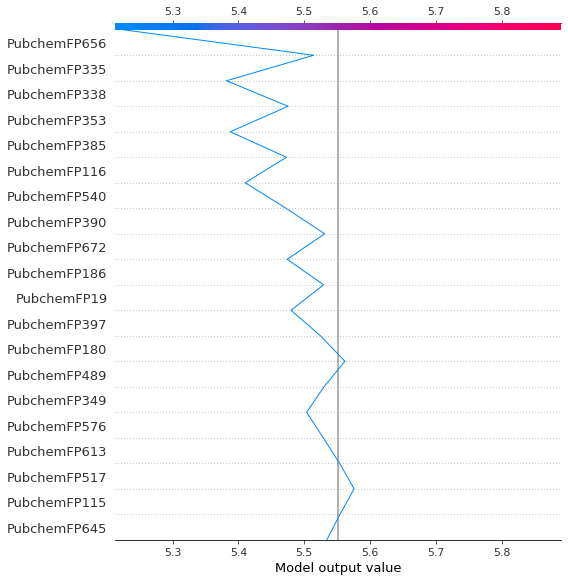

In [97]:
shap.decision_plot(explainer.expected_value, shap_values[0].values, feature_names=list(feature_name))

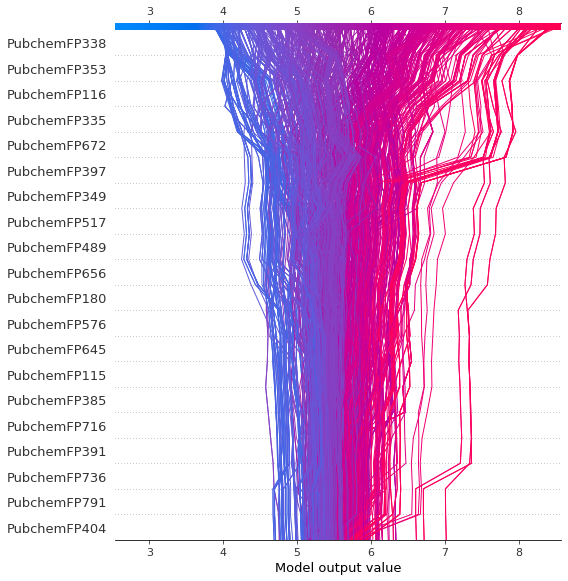

In [91]:
shap.decision_plot(explainer.expected_value, shap_values.values, feature_names=list(feature_name))

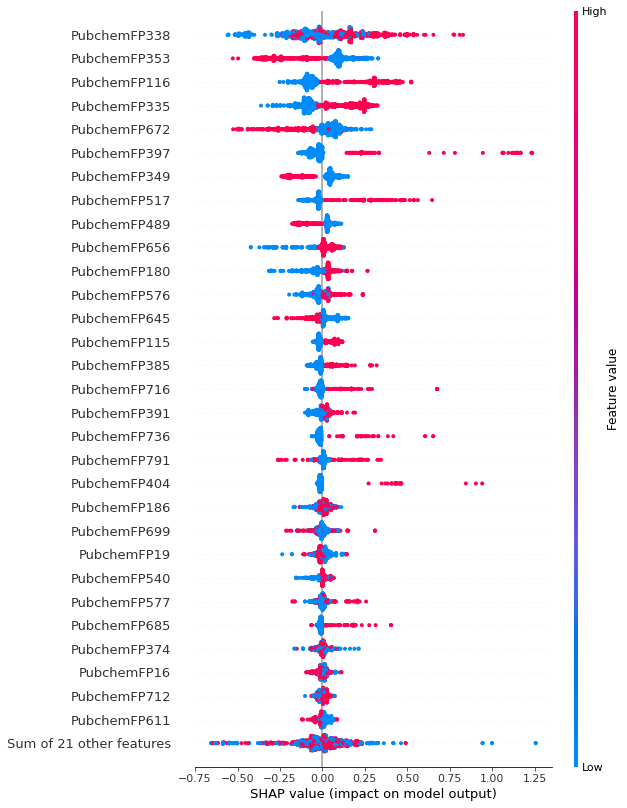

In [92]:
shap.plots.beeswarm(shap_values, max_display=31)

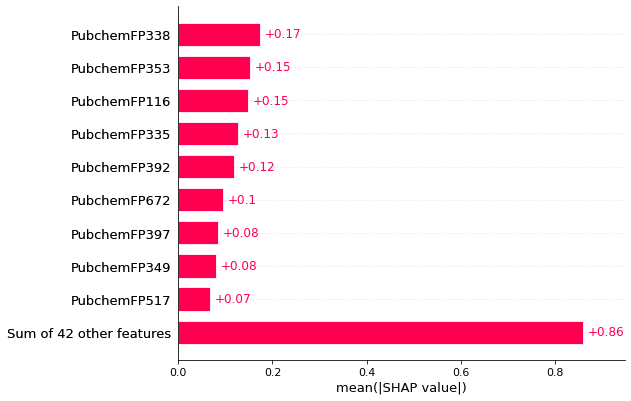

In [93]:
shap.plots.bar(shap_values)
max_display=31

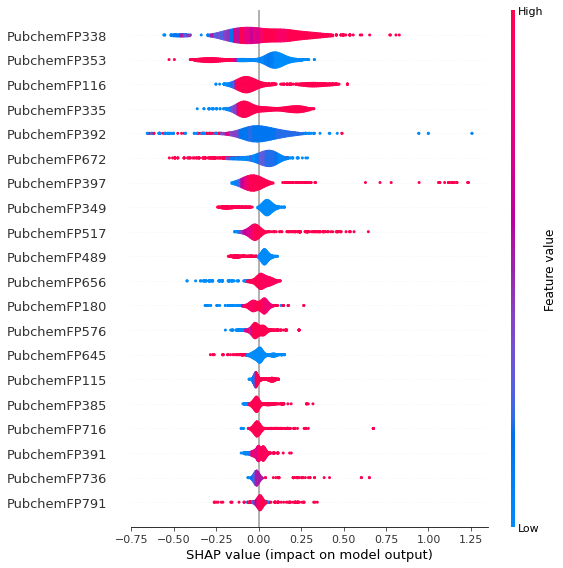

In [94]:
shap.summary_plot(shap_values, feature_names=list(feature_name), plot_type='violin')

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(explainer.expected_value, shap_values.values)

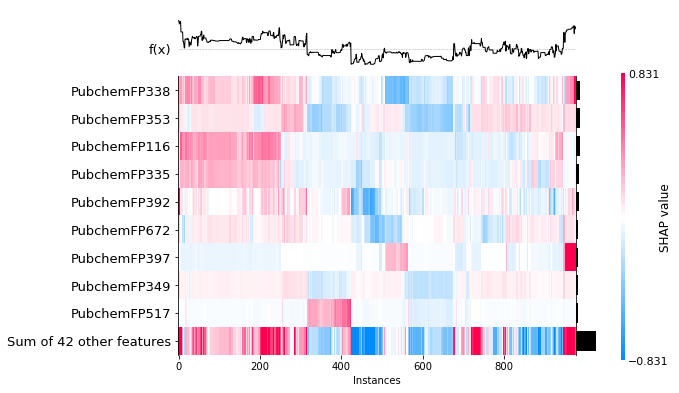

In [95]:
shap.plots.heatmap(shap_values)

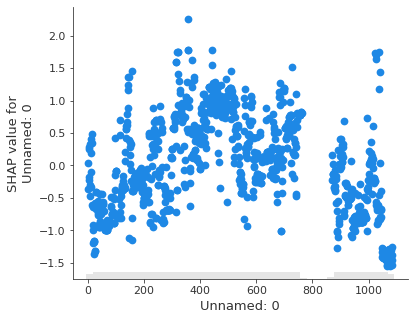

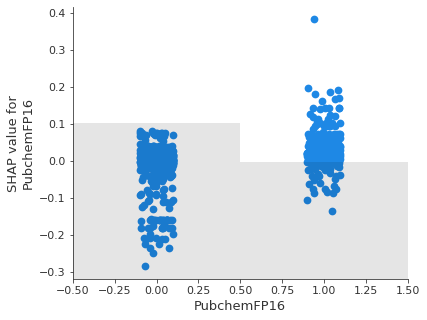

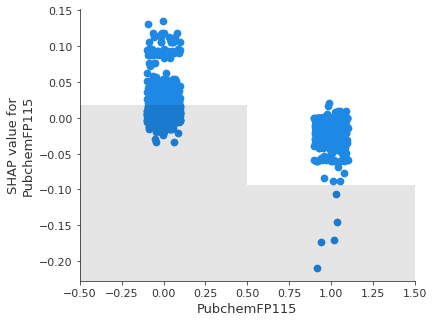

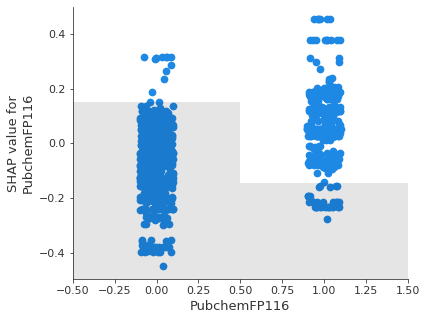

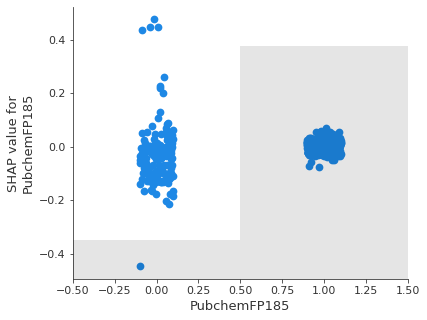

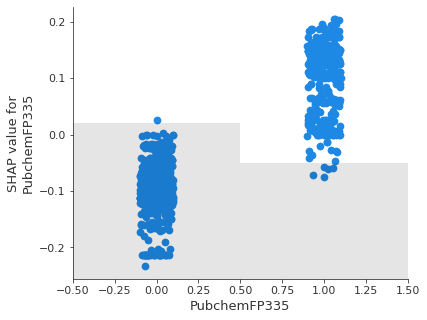

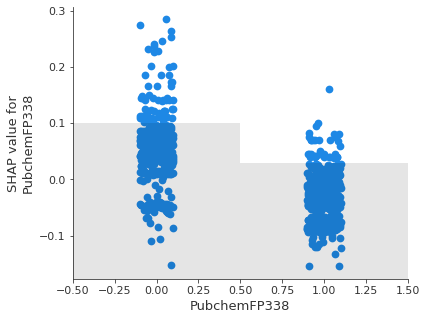

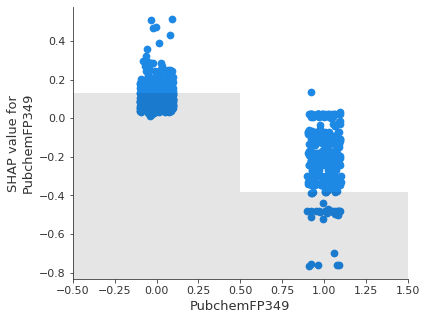

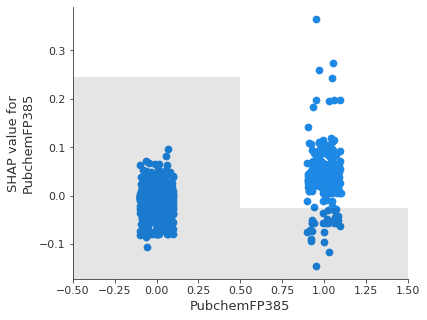

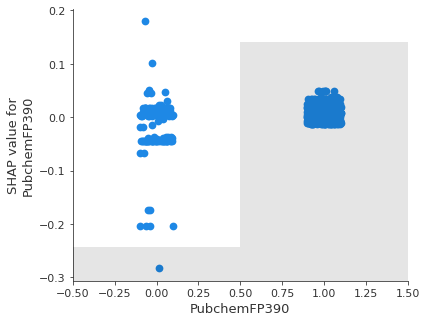

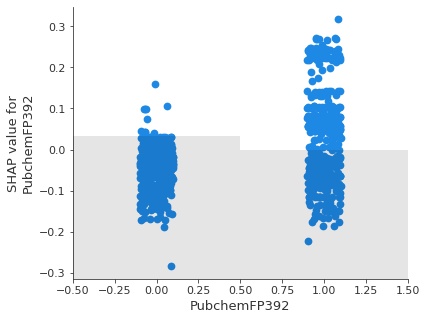

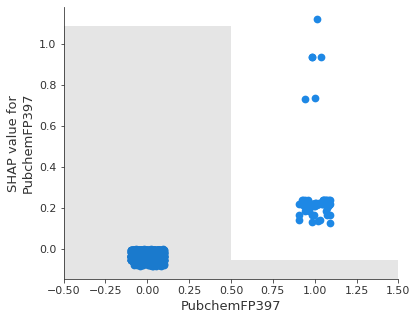

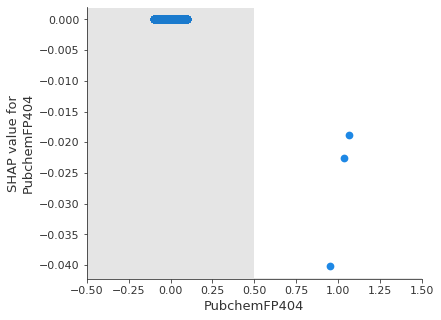

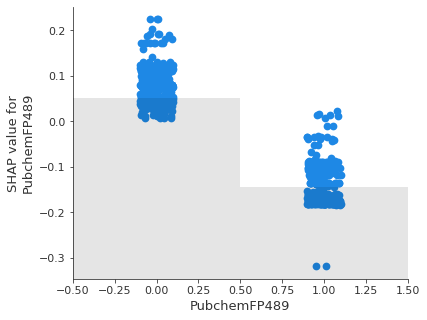

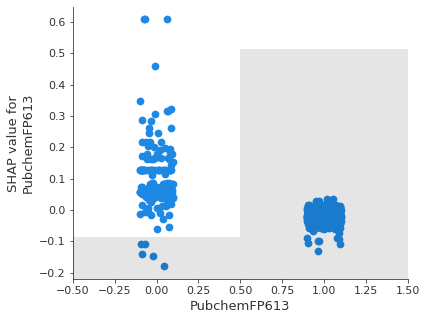

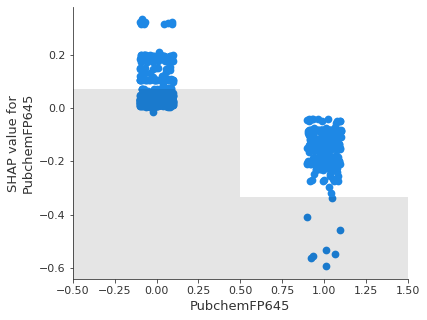

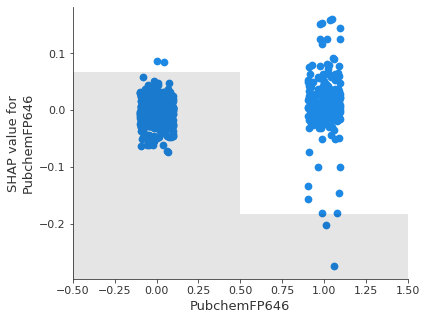

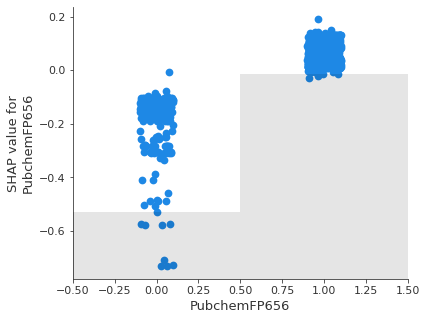

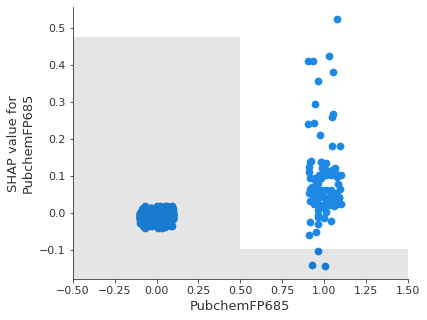

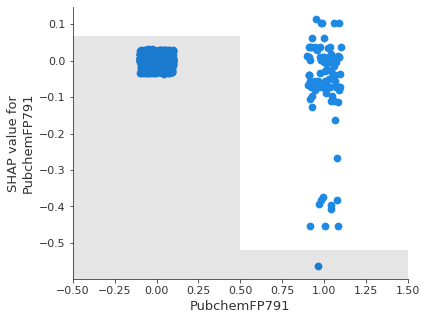

IndexError: index 20 is out of bounds for axis 1 with size 20

In [41]:
for i in range(50):
    shap.plots.scatter(shap_values[:,i],dot_size=60)